# 텐서플로가 제공하는 데이터셋 확인

In [ ]:
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

## 1. MNIST 필기 숫자 데이터셋

In [ ]:

(X_train, y_train), (X_test, y_test) = ds.mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
plt.figure(figsize=(8,6))
plt.suptitle('NMIST', fontsize=30)

Text(0.5, 0.98, 'NMIST')

<Figure size 576x432 with 0 Axes>

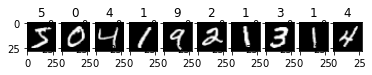

In [ ]:
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.title(str(y_train[i])).fontsize = 30

## 2. CIFAR-10 자연영상 데이터셋 

In [ ]:
(X_train, y_train),(X_test, y_test) = ds.cifar10.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
class_names = ['airplane', 'car', 'bird','cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(24,3))
plt.suptitle('CIFAR-10', fontsize = 30)

Text(0.5, 0.98, 'CIFAR-10')

<Figure size 1728x216 with 0 Axes>

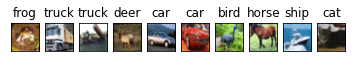

In [ ]:
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(X_train[i])
  plt.xticks([]); plt.yticks([])
  plt.title(class_names[y_train[i,0]], fontsize = 12)

# 필기 숫자 인식

## 1. 다층퍼셉트론으로 MNIST 인식하기 (optimizer = SGD)

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

(X_train, y_train),(X_test, y_test) = ds.mnist.load_data()
X_train.shape, y_test.shape

((60000, 28, 28), (10000,))

In [ ]:
print(dir(y_test))
y_test.max()

['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '

9

In [ ]:
X_train = X_train.reshape(60000, 784) # 2차원 구조로 변환환
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype(np.float32)/255.0  #[0,1]로 정규화
X_test = X_test.astype(np.float32)/255.0 

y_train = tf.keras.utils.to_categorical(y_train, 10) # 카테고리형을 수치형으로 인코딩
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = Sequential()
model.add(Dense(units=512, activation='tanh', input_shape=(784,)))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='MSE', optimizer=SGD(learning_rate=0.01), metrics=['accuracy']) # learning_rate = 학습률률

model.fit(X_train, y_train, batch_size = 128, epochs = 50, validation_data = (X_test, y_test), verbose = 2)

Epoch 1/50
469/469 - 5s - loss: 0.0877 - accuracy: 0.2140 - val_loss: 0.0843 - val_accuracy: 0.3237 - 5s/epoch - 11ms/step
Epoch 2/50
469/469 - 5s - loss: 0.0809 - accuracy: 0.4197 - val_loss: 0.0767 - val_accuracy: 0.5032 - 5s/epoch - 11ms/step
Epoch 3/50
469/469 - 4s - loss: 0.0732 - accuracy: 0.5306 - val_loss: 0.0688 - val_accuracy: 0.5672 - 4s/epoch - 9ms/step
Epoch 4/50
469/469 - 4s - loss: 0.0659 - accuracy: 0.5810 - val_loss: 0.0619 - val_accuracy: 0.6104 - 4s/epoch - 9ms/step
Epoch 5/50
469/469 - 5s - loss: 0.0598 - accuracy: 0.6208 - val_loss: 0.0563 - val_accuracy: 0.6510 - 5s/epoch - 10ms/step
Epoch 6/50
469/469 - 4s - loss: 0.0548 - accuracy: 0.6646 - val_loss: 0.0517 - val_accuracy: 0.6937 - 4s/epoch - 9ms/step
Epoch 7/50
469/469 - 4s - loss: 0.0507 - accuracy: 0.7052 - val_loss: 0.0479 - val_accuracy: 0.7314 - 4s/epoch - 8ms/step
Epoch 8/50
469/469 - 5s - loss: 0.0472 - accuracy: 0.7331 - val_loss: 0.0446 - val_accuracy: 0.7519 - 5s/epoch - 11ms/step
Epoch 9/50
469/469 -

In [ ]:
res = model.evaluate(X_test, y_test, verbose=0)
print('정확률 = ', res[1]*100)

정확률 =  89.50999975204468


## 2. optimizer = Adam 으로 성능 향상 시키기


In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test,10)

model = Sequential()
model.add(Dense(units = 512, activation = 'tanh', input_shape = (784,)))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss='MSE', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

model.fit(x_train, y_train, batch_size = 128, epochs=50, validation_data=(x_test, y_test), verbose=2)

Epoch 1/50
469/469 - 7s - loss: 0.0149 - accuracy: 0.9007 - val_loss: 0.0095 - val_accuracy: 0.9373 - 7s/epoch - 15ms/step
Epoch 2/50
469/469 - 5s - loss: 0.0088 - accuracy: 0.9425 - val_loss: 0.0078 - val_accuracy: 0.9507 - 5s/epoch - 12ms/step
Epoch 3/50
469/469 - 6s - loss: 0.0065 - accuracy: 0.9587 - val_loss: 0.0060 - val_accuracy: 0.9593 - 6s/epoch - 13ms/step
Epoch 4/50
469/469 - 6s - loss: 0.0051 - accuracy: 0.9683 - val_loss: 0.0054 - val_accuracy: 0.9650 - 6s/epoch - 12ms/step
Epoch 5/50
469/469 - 6s - loss: 0.0041 - accuracy: 0.9749 - val_loss: 0.0045 - val_accuracy: 0.9711 - 6s/epoch - 13ms/step
Epoch 6/50
469/469 - 5s - loss: 0.0034 - accuracy: 0.9803 - val_loss: 0.0042 - val_accuracy: 0.9726 - 5s/epoch - 11ms/step
Epoch 7/50
469/469 - 5s - loss: 0.0028 - accuracy: 0.9834 - val_loss: 0.0040 - val_accuracy: 0.9744 - 5s/epoch - 12ms/step
Epoch 8/50
469/469 - 6s - loss: 0.0024 - accuracy: 0.9863 - val_loss: 0.0040 - val_accuracy: 0.9749 - 6s/epoch - 12ms/step
Epoch 9/50
469/4

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
(x_train,y_train),(x_test,y_test)=ds.mnist.load_data()


x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)

x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0

y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)


mlp=Sequential()
mlp.add(Dense(units=512,activation='tanh',input_shape=(784,)))
mlp.add(Dense(units=10,activation='softmax'))
mlp.compile(loss='MSE',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
mlp.fit(x_train,y_train,batch_size=128,epochs=50,validation_data=(x_test,y_test),verbose=2)


Epoch 1/50
469/469 - 7s - loss: 0.0148 - accuracy: 0.9029 - val_loss: 0.0104 - val_accuracy: 0.9334 - 7s/epoch - 14ms/step
Epoch 2/50
469/469 - 6s - loss: 0.0089 - accuracy: 0.9426 - val_loss: 0.0083 - val_accuracy: 0.9463 - 6s/epoch - 13ms/step
Epoch 3/50
469/469 - 6s - loss: 0.0065 - accuracy: 0.9586 - val_loss: 0.0061 - val_accuracy: 0.9602 - 6s/epoch - 12ms/step
Epoch 4/50
469/469 - 7s - loss: 0.0050 - accuracy: 0.9685 - val_loss: 0.0049 - val_accuracy: 0.9682 - 7s/epoch - 15ms/step
Epoch 5/50
469/469 - 6s - loss: 0.0040 - accuracy: 0.9749 - val_loss: 0.0045 - val_accuracy: 0.9703 - 6s/epoch - 12ms/step
Epoch 6/50
469/469 - 7s - loss: 0.0034 - accuracy: 0.9795 - val_loss: 0.0041 - val_accuracy: 0.9733 - 7s/epoch - 14ms/step
Epoch 7/50
469/469 - 5s - loss: 0.0028 - accuracy: 0.9832 - val_loss: 0.0039 - val_accuracy: 0.9747 - 5s/epoch - 11ms/step
Epoch 8/50
469/469 - 6s - loss: 0.0023 - accuracy: 0.9861 - val_loss: 0.0036 - val_accuracy: 0.9763 - 6s/epoch - 14ms/step
Epoch 9/50
469/4

In [ ]:
res = model.evaluate(x_test, y_test, verbose=0)
print('정확률 :', res[1]*100)

정확률 : 98.15000295639038


## 3. SGD와 Adam 성능을 그래프로 비교

In [7]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

(x_train, y_train), (x_test, y_test)  = ds.mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# sgd 모델설계, 평가
model_sgd = Sequential()
model_sgd.add(Dense(units=512, activation='tanh', input_shape = (784,)))
model_sgd.add(Dense(units=10, activation='softmax'))

model_sgd.compile(loss='MSE', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

his_sgd = model_sgd.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test,y_test), verbose=2)

Epoch 1/50
469/469 - 4s - loss: 0.0894 - accuracy: 0.1592 - val_loss: 0.0867 - val_accuracy: 0.2400 - 4s/epoch - 9ms/step
Epoch 2/50
469/469 - 4s - loss: 0.0831 - accuracy: 0.3467 - val_loss: 0.0795 - val_accuracy: 0.4240 - 4s/epoch - 8ms/step
Epoch 3/50
469/469 - 5s - loss: 0.0757 - accuracy: 0.4626 - val_loss: 0.0719 - val_accuracy: 0.5025 - 5s/epoch - 10ms/step
Epoch 4/50
469/469 - 4s - loss: 0.0686 - accuracy: 0.5349 - val_loss: 0.0651 - val_accuracy: 0.5905 - 4s/epoch - 8ms/step
Epoch 5/50
469/469 - 4s - loss: 0.0622 - accuracy: 0.6219 - val_loss: 0.0588 - val_accuracy: 0.6665 - 4s/epoch - 8ms/step
Epoch 6/50
469/469 - 5s - loss: 0.0564 - accuracy: 0.6815 - val_loss: 0.0532 - val_accuracy: 0.7064 - 5s/epoch - 10ms/step
Epoch 7/50
469/469 - 4s - loss: 0.0513 - accuracy: 0.7129 - val_loss: 0.0485 - val_accuracy: 0.7337 - 4s/epoch - 9ms/step
Epoch 8/50
469/469 - 4s - loss: 0.0472 - accuracy: 0.7383 - val_loss: 0.0446 - val_accuracy: 0.7587 - 4s/epoch - 8ms/step
Epoch 9/50
469/469 - 5

In [8]:
res = model_sgd.evaluate(x_test, y_test, verbose=0)[1]*100
print('SGD 정확도:', res)

SGD 정확도: 89.60000276565552


In [11]:
# Adam 시각화, 평가
model_adam = Sequential()
model_adam.add(Dense(units=512, activation='tanh', input_shape=(784,)))
model_adam.add(Dense(units=10, activation='softmax'))
model_adam.compile(loss='MSE', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist_adam = model_adam.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)

Epoch 1/50
469/469 - 6s - loss: 0.0149 - accuracy: 0.9000 - val_loss: 0.0101 - val_accuracy: 0.9351 - 6s/epoch - 13ms/step
Epoch 2/50
469/469 - 6s - loss: 0.0090 - accuracy: 0.9417 - val_loss: 0.0078 - val_accuracy: 0.9502 - 6s/epoch - 12ms/step
Epoch 3/50
469/469 - 5s - loss: 0.0066 - accuracy: 0.9581 - val_loss: 0.0060 - val_accuracy: 0.9615 - 5s/epoch - 10ms/step
Epoch 4/50
469/469 - 6s - loss: 0.0049 - accuracy: 0.9696 - val_loss: 0.0052 - val_accuracy: 0.9650 - 6s/epoch - 14ms/step
Epoch 5/50
469/469 - 5s - loss: 0.0040 - accuracy: 0.9753 - val_loss: 0.0046 - val_accuracy: 0.9703 - 5s/epoch - 10ms/step
Epoch 6/50
469/469 - 6s - loss: 0.0033 - accuracy: 0.9803 - val_loss: 0.0042 - val_accuracy: 0.9736 - 6s/epoch - 12ms/step
Epoch 7/50
469/469 - 5s - loss: 0.0028 - accuracy: 0.9830 - val_loss: 0.0039 - val_accuracy: 0.9745 - 5s/epoch - 11ms/step
Epoch 8/50
469/469 - 5s - loss: 0.0024 - accuracy: 0.9863 - val_loss: 0.0040 - val_accuracy: 0.9749 - 5s/epoch - 10ms/step
Epoch 9/50
469/4

In [12]:
res_adam = model_adam.evaluate(x_test, y_test, verbose = 0)[1]*100
print('Adam 정확도 :', res_adam)

Adam 정확도 : 98.17000031471252


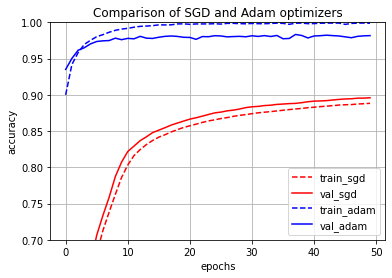

In [15]:
# 시각화 
import matplotlib.pyplot as plt
plt.plot(his_sgd.history['accuracy'], 'r--')
plt.plot(his_sgd.history['val_accuracy'], 'r')
plt.plot(hist_adam.history['accuracy'], 'b--')
plt.plot(hist_adam.history['val_accuracy'], 'b')

plt.title('Comparison of SGD and Adam optimizers')

plt.ylim((0.7, 1.0))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_sgd', 'val_sgd', 'train_adam', 'val_adam'])
plt.grid()
plt.show()

# 하이퍼 매개변수 다루기

## 1. 깊은 다층 퍼셉트론으로 MNIST 인식

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


model = Sequential()
model.add(Dense(units = 1024, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs = 50, batch_size = 128, validation_data = (x_test, y_test), verbose = 2)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
469/469 - 23s - loss: 0.3970 - accuracy: 0.8971 - val_loss: 0.1736 - val_accuracy: 0.9482 - 23s/epoch - 49ms/step
Epoch 2/50
469/469 - 16s - loss: 0.1413 - accuracy: 0.9591 - val_loss: 0.1146 - val_accuracy: 0.9647 - 16s/epoch - 34ms/step
Epoch 3/50
469/469 - 15s - loss: 0.0954 - accuracy: 0.9722 - val_loss: 0.0897 - val_accuracy: 0.9707 - 15s/epoch - 33ms/step
Epoch 4/50
469/469 - 16s - loss: 0.0688 - accuracy: 0.9801 - val_loss: 0.0803 - val_accuracy: 0.9736 - 16s/epoch - 34ms/step
Epoch 5/50
469/469 - 16s - loss: 0.0525 - accuracy: 0.9848 - val_loss: 0.0687 - val_accuracy: 0.9789 - 16s/epoch - 35ms/step
Epoch 6/50
469/469 - 15s - loss: 0.0393 - accuracy: 0.9891 - val_loss: 0.0713 - val_accuracy: 0.9773 - 15s/epoch - 33ms/step
Epoch 7/50
469/469 - 15s - loss: 0.0298 - accuracy: 0.9919 - val_loss: 0.0627 - val_accuracy: 0.9805 - 15s/epoch - 33ms/step
Epoch 8/50
469/469 - 16s - loss: 0.0231 - accuracy: 0.9940 -

In [4]:
res = model.evaluate(x_test, y_test,verbose = 0)[1]*100
print('정확도 : ', res)

정확도 :  97.11999893188477


In [5]:
model.save('deep_model_trained.h5')

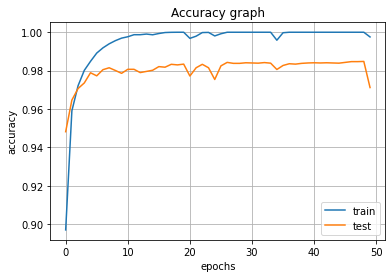

In [9]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.show() # 에포치를 늘릴수록 정확도가 올라감을 알 수 있음 (최적의 에포치 = 10이상)

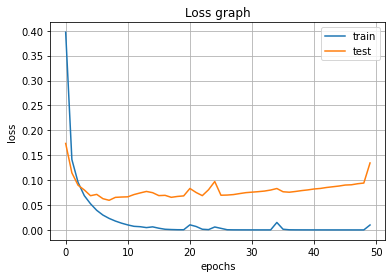

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.grid()
plt.show() # 에포치를 늘릴수록 오류가 줄어듦을 알 수 있음(최적의 에포치 = 18이상)

# 자연 영상 인식

## 1. 깊은 다층퍼셉트론으로 CIFAR-10 인식하기 

In [10]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [11]:
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()

x_train = x_train.reshape(50000, 3072) # 2차원으로 축소
x_test = x_test.reshape(10000, 3072)

x_train = x_train.astype(np.float32)/255.0 # 정규화 
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

d_model = Sequential()
d_model.add(Dense(units = 1024, activation = 'relu', input_shape = (3072,)))
d_model.add(Dense(units = 512, activation = 'relu'))
d_model.add(Dense(units = 512, activation = 'relu'))
d_model.add(Dense(units = 10, activation = 'softmax'))

d_model.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate = 0.0001), metrics=['accuracy'])

hist = d_model.fit(x_train, y_train, epochs = 50, batch_size = 128, validation_data = (x_test, y_test), verbose = 2)

170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/50
391/391 - 43s - loss: 1.8229 - accuracy: 0.3513 - val_loss: 1.6567 - val_accuracy: 0.4148 - 43s/epoch - 111ms/step
Epoch 2/50
391/391 - 29s - loss: 1.6165 - accuracy: 0.4278 - val_loss: 1.5628 - val_accuracy: 0.4423 - 29s/epoch - 75ms/step
Epoch 3/50
391/391 - 29s - loss: 1.5348 - accuracy: 0.4559 - val_loss: 1.5436 - val_accuracy: 0.4536 - 29s/epoch - 75ms/step
Epoch 4/50
391/391 - 28s - loss: 1.4658 - accuracy: 0.4807 - val_loss: 1.4622 - val_accuracy: 0.4770 - 28s/epoch - 72ms/step
Epoch 5/50
391/391 - 28s - loss: 1.4214 - accuracy: 0.4975 - val_loss: 1.4543 - val_accuracy: 0.4869 - 28s/epoch - 71ms/step
Epoch 6/50
391/391 - 28s - loss: 1.3733 - accuracy: 0.5146 - val_loss: 1.3948 - val_accuracy: 0.5018 - 28s/epoch - 72ms/step
Epoch 7/50
391/391 - 29s - loss: 1.3354 - accuracy: 0.5269 - val_loss: 1.3919 - val_accuracy: 0.5010 - 29s/epoch - 74ms/step
Epoch 8/50
391/391 - 28s - loss: 1.2992 - accuracy: 0.540

In [12]:
print('정확률 :', d_model.evaluate(x_test, y_test, verbose = 0)[1]*100)

정확률 : 55.070000886917114


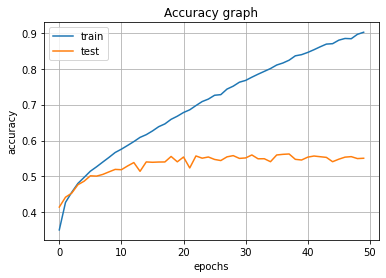

In [13]:
# 시각화 
# d_model.save('d_model_trained.h5)

import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

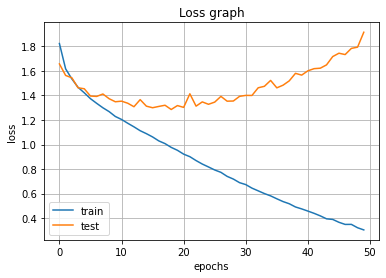

In [14]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.grid()
plt.show()